# samsung innovation campus - stock market forecasting
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid orange">
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

# import all the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Dataset
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

In [2]:
# read the dataset
dataset=pd.read_csv("/kaggle/input/apple-stock-price-from-19802021/AAPL.csv")

# Understanding Data
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

In [3]:
dataset.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600

In [4]:
dataset.tail(5)

Date        Open        High         Low       Close   Adj Close  \
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
10463  122207100  
10464   84784300  
10465   91533000  
10466  108123900  
10467  134118500

In [5]:
# Check the shape of the dataset
dataset.shape

(10468, 7)

In [6]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [7]:
# Check Is there any null values in the Dataset
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Check the Duplicate value in the Dataset
dataset.duplicated().sum()

0

In [9]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [10]:
from datetime import date

d0 = date(1980, 12, 12)
d1 = date(2022, 6, 17)
delta = d1 - d0
print(delta.days)

print("\nThere are {} days missing".format(delta.days-dataset.shape[0]))

15162

There are 4694 days missing


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [12]:
# Lets Describe the dataset
dataset.describe().T

count                           mean                  min  \
Date         10468  2001-09-07 05:59:43.492548608  1980-12-12 00:00:00   
Open       10468.0                      14.757987             0.049665   
High       10468.0                      14.921491             0.049665   
Low        10468.0                      14.594484             0.049107   
Close      10468.0                      14.763533             0.049107   
Adj Close  10468.0                      14.130431             0.038329   
Volume     10468.0                330848870.09935                  0.0   

                           25%                  50%                  75%  \
Date       1991-04-21 06:00:00  2001-08-28 12:00:00  2012-01-25 06:00:00   
Open                  0.283482             0.474107            14.953303   
High                  0.289286             0.482768            15.057143   
Low                   0.276786              0.46596            14.692589   
Close                 0.283482             0.475446            14.901964   
Adj Close             0.235462             0.392373            12.835269   
Volume             123776800.0          218159200.0          410579400.0   

                           max              std  
Date       2022-06-17 00:00:00              NaN  
Open                182.630005        31.914174  
High                182.940002        32.289158  
Low                 179.119995        31.543959  
Close               182.009995        31.929489  
Adj Close           181.511703        31.637275  
Volume            7421640800.0  338841842.88128

# Visualize the Correlation Matrix

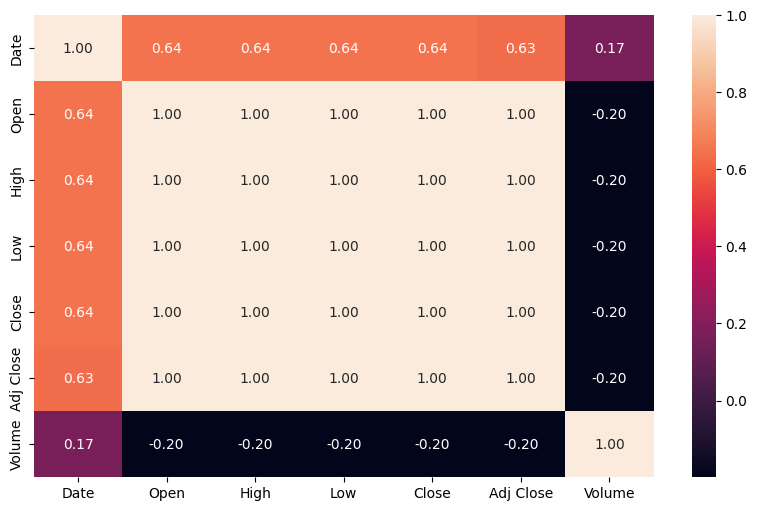

In [13]:
# # Lets Visualise the Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), fmt=".2f", annot=True)
plt.show()

### Insights from correlation matrix

-> The correlation coefficients between Open, High, Low, Close, and Adj Close are very close to 1. This indicates an extremely strong positive linear relationship between these variables. It suggests that these variables move in almost perfect synchronization.\
-> There is a negative correlation between the Volume and each of the price variables (Open, High, Low, Close, Adj Close). The correlation coefficients are relatively small but consistent across all price variables. This suggests that as prices increase, the trading volume tends to decrease, and vice versa.

# Exploratory Data Analysis

In [14]:
# Analysis of High and Low Stocks of Apple From Year 1985-2022 ie., the entire dataset
fig = px.line(dataset, x="Date", y=["High","Low"],title="Stocks High and Low Values Over Time")
fig.show()

In [15]:
# Analysis of High and Low Stocks From Year 2017-2022 previous 5 years

fig = px.line(dataset, x="Date", y=["High","Low"], range_x=['2017-01-01','2022-06-17'])
fig.show()

In [16]:
# Open and Close Stocks Over Time
fig = px.area(dataset, x="Date", y=["Open","Close"])
fig.show()

In [17]:
# Analysis of Open and Close Stocks From Year 2017-Current Year

fig = px.area(dataset, x="Date", y=["Open","Close"], range_x=['2017-01-01','2022-06-17'])
fig.show()

In [18]:
fig = px.line(dataset, x="Date", y=["Volume"],color_discrete_sequence=["blue"], title="Stock Volume Over Time")
fig.show()


# comparison of Open, High, Low, Close stocks

In [19]:
list1=["Open","High","Low","Close"]
list2=["High", "Low"]
list3=["Open","Close"]
list4=[list1, list2, list3]


for i in range(len(list4)):
    fig = px.line(dataset, x="Date", y=list4[i], title="Stocks Distribution over Different Time Window")

    # Update the x-axis settings to include a range slider
    # This allows users to zoom in on specific date ranges
    fig.update_xaxes(
    rangeslider_visible=True,

    # Configure a rangeselector with buttons for different time intervals
    rangeselector=dict(
    buttons=list([
    dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6, label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=5, label="5y", step="year", stepmode="backward"),
    dict(count=10, label="10y", step="year", stepmode="backward"),
    dict(step="all")
    ])
    )
    )
   
  # Display the figure
    fig.show()
    break

# Moving Average

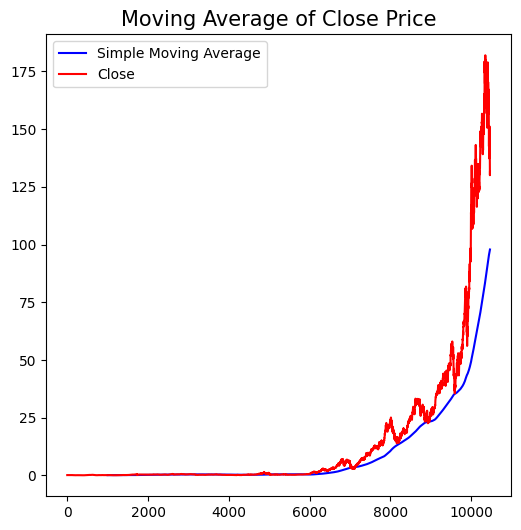

In [20]:
columns=["Close"]

for col in columns:
    simple_moving_average_stock =dataset[col].rolling(window=1000).mean()
    plt.figure(figsize=(6,6))
    simple_moving_average_stock.plot(label="Simple Moving Average", color="blue")
    dataset[col].plot(label=col, color="red")
    plt.xticks(rotation=0)
    plt.title(f"Moving Average of {col} Price", size=15)
    plt.legend()
    plt.show()


# Note On How Data Is Created For Time Series Analysis
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

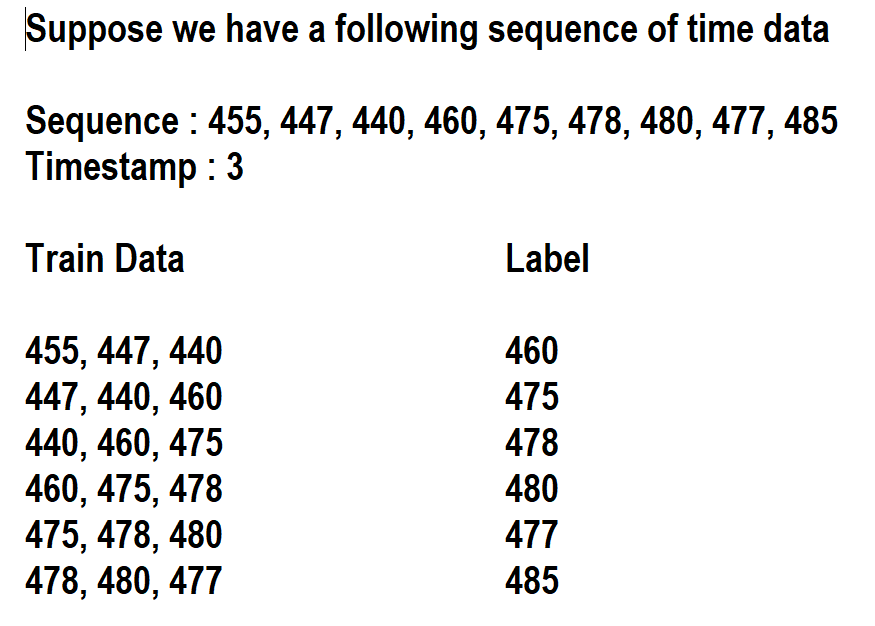

# LSTM - Univariate
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

In [21]:
# df = dataset[dataset['Date'] > '2019-12-31'].reset_index()
# df = df.drop(columns = ["index"])

In [22]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [23]:
import math 
window = 20 # Number of days we are looking back for our predictions

close_prices = df['Adj Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

The reshaping is necessary because LSTM networks expect input data to have a three-dimensional shape: (number_of_samples, sequence_length, number_of_features).

(x_train.shape[0], x_train.shape[1], 1): The new shape is specified as a tuple with three components:

x_train.shape[0]: The first component represents the number of samples or sequences in the training data. This corresponds to the number of rows in x_train.
x_train.shape[1]: The second component represents the length of each sequence. This corresponds to the number of columns in x_train.
1: The third component represents the number of features for each time step in the sequence. In this case, it's set to 1 because each sequence is a univariate time series (only the closing prices are considered).

In [24]:
test_data = scaled_data[training_data_len-window: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

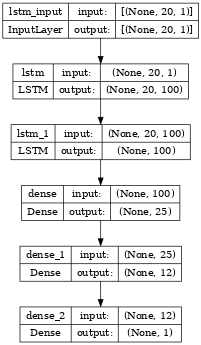

In [25]:
import keras

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(12))
model.add(layers.Dense(1))

plot_model(model, show_shapes = True,expand_nested = True,dpi = 50)


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=5)

Epoch 1/5
8355/8355 [==============================] - 49s 5ms/step - loss: 2.1847e-05
Epoch 2/5
8355/8355 [==============================] - 44s 5ms/step - loss: 7.7004e-06
Epoch 3/5
8355/8355 [==============================] - 44s 5ms/step - loss: 4.6989e-06
Epoch 4/5
8355/8355 [==============================] - 44s 5ms/step - loss: 4.0624e-06
Epoch 5/5
8355/8355 [==============================] - 44s 5ms/step - loss: 4.6474e-06


In [27]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

66/66 [==============================] - 1s 3ms/step
The root mean squared error is 5.20


/tmp/ipykernel_32/1543030245.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



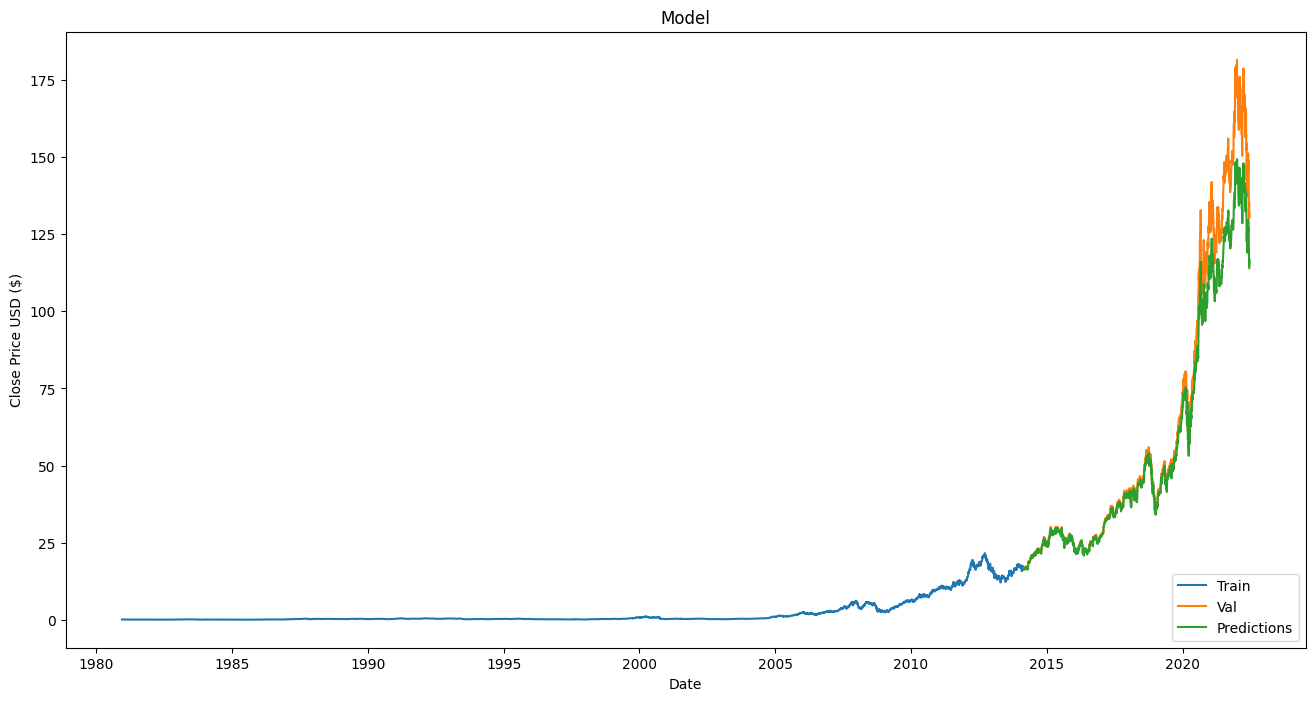

In [28]:
import matplotlib.pyplot as plt

data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

# LSTM - Multivariate
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

In [30]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [31]:
close_prices = df['Adj Close']
values = close_prices.values
scaler_for_adjclose = MinMaxScaler(feature_range=(0,1)) # Important to separate out this scaler so that we can reverse prediction values later on
scaled_data_for_adjclose = scaler_for_adjclose.fit_transform(values.reshape(-1,1))

In [32]:
scaler_for_other_data = MinMaxScaler(feature_range=(0,1))
scaled_data_for_otherdata = scaler_for_other_data.fit_transform(df[[i for i in df.columns if i != 'Adj Close']])

In [33]:
final_scaled_data = np.concatenate((scaled_data_for_otherdata, scaled_data_for_adjclose), axis=1)

In [34]:
window = 20 # Number of days we are looking back for our predictions

df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

training_data_len = math.ceil(len(values)* 0.8)

train_data = final_scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, :])
    y_train.append(train_data[i, -1])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))

test_data = final_scaled_data[training_data_len-window: , : ]
x_test = []
y_test = final_scaled_data[training_data_len:, -1]

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i, :])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

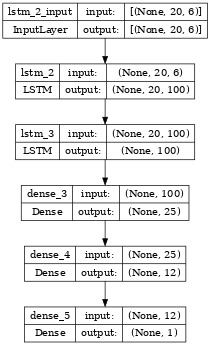

In [35]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 6)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(12))
model.add(layers.Dense(1))

plot_model(model, show_shapes = True,expand_nested = True,dpi = 50)

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=5)

Epoch 1/5
8355/8355 [==============================] - 48s 5ms/step - loss: 1.8219e-05
Epoch 2/5
8355/8355 [==============================] - 44s 5ms/step - loss: 8.8987e-06
Epoch 3/5
8355/8355 [==============================] - 44s 5ms/step - loss: 3.6181e-06
Epoch 4/5
8355/8355 [==============================] - 44s 5ms/step - loss: 3.6192e-06
Epoch 5/5
8355/8355 [==============================] - 44s 5ms/step - loss: 2.9023e-06


In [37]:
predictions = model.predict(x_test)
predictions = scaler_for_adjclose.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

66/66 [==============================] - 1s 3ms/step
The root mean squared error is 44.89


/tmp/ipykernel_32/463297934.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



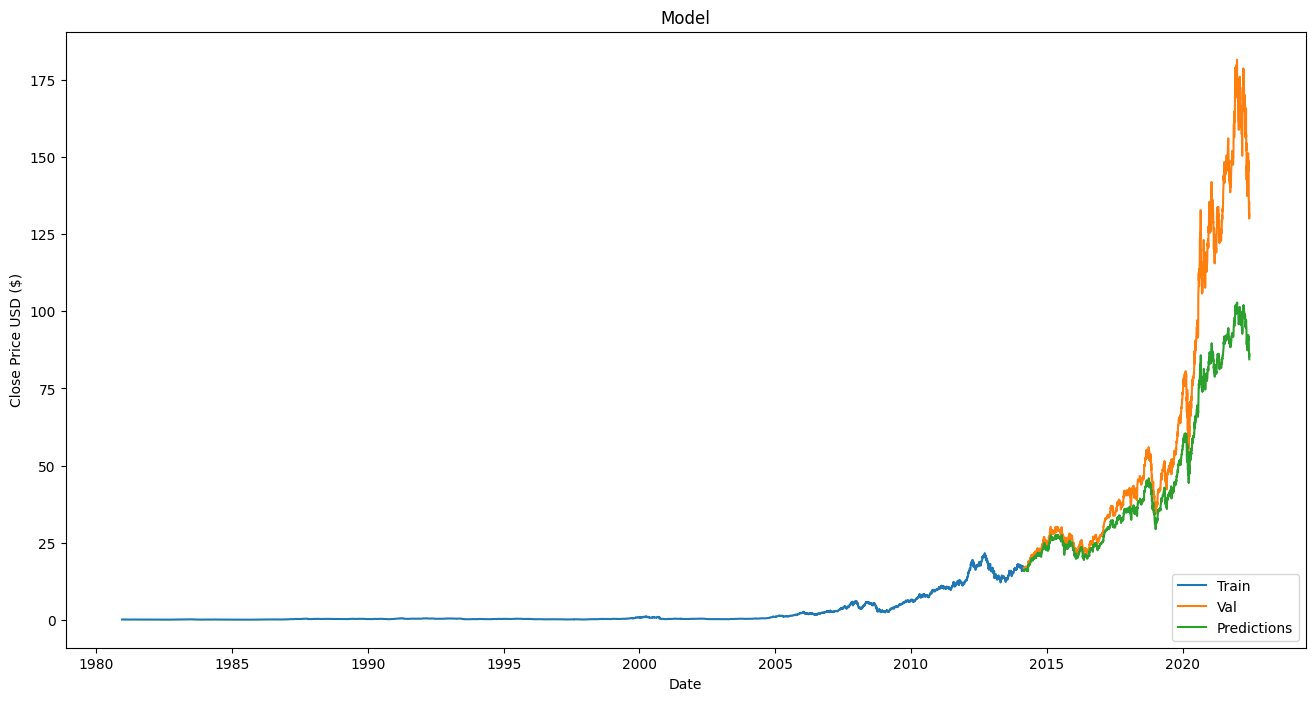

In [38]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

# LSTM - smaller dataset - univariate
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

In [40]:
import math
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[pd.DatetimeIndex(df['Date']).year>=2020].set_index('Date')[[i for i in df.columns if i!= 'Date']]

window = 20 # Number of days we are looking back for our predictions

close_prices = df['Adj Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-window: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

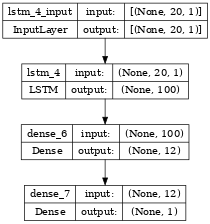

In [41]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(layers.Dense(12))
model.add(layers.Dense(1))

plot_model(model, show_shapes = True,expand_nested = True,dpi = 50)

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, validation_data = (x_test,y_test) , batch_size= 1, epochs=5)

Epoch 1/5
477/477 [==============================] - 4s 5ms/step - loss: 0.0045 - val_loss: 26147.5059
Epoch 2/5
477/477 [==============================] - 2s 4ms/step - loss: 0.0013 - val_loss: 26155.6699
Epoch 3/5
477/477 [==============================] - 2s 4ms/step - loss: 8.8069e-04 - val_loss: 26156.6113
Epoch 4/5
477/477 [==============================] - 2s 4ms/step - loss: 9.8286e-04 - val_loss: 26154.4863
Epoch 5/5
477/477 [==============================] - 2s 4ms/step - loss: 8.7656e-04 - val_loss: 26153.2578


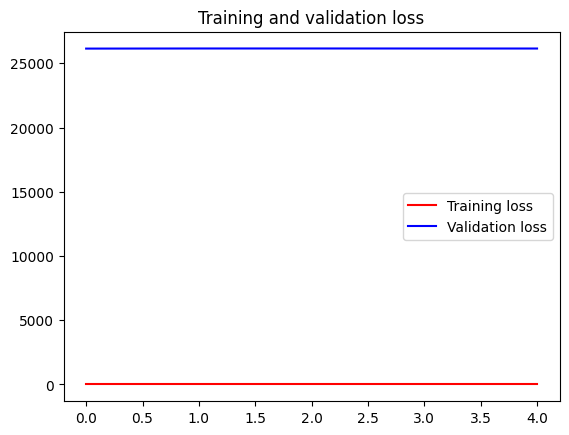

<Figure size 640x480 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [44]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

4/4 [==============================] - 0s 3ms/step
The root mean squared error is 0.80


/tmp/ipykernel_32/463297934.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



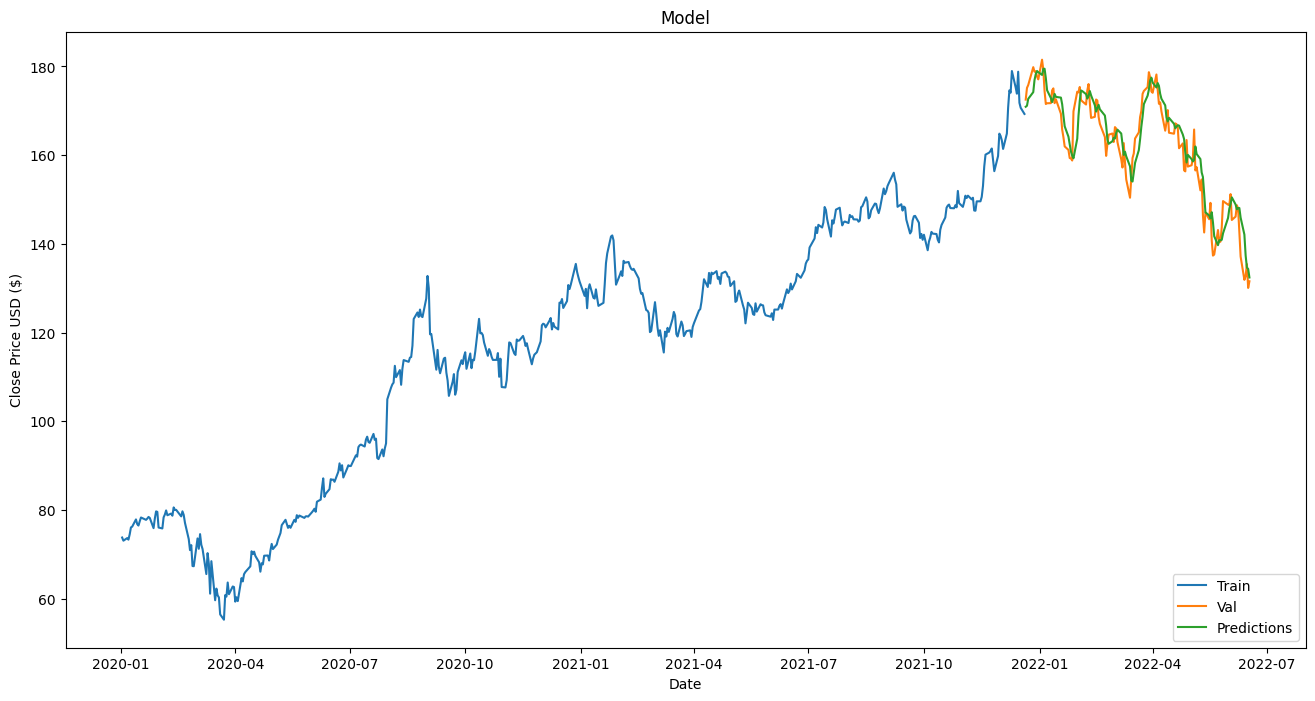

In [45]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

# LSTM - smaller dataset - multivariate
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

In [47]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df[9800:]

In [48]:
close_prices = df['Adj Close']
values = close_prices.values
scaler_for_adjclose = MinMaxScaler(feature_range=(0,1)) # Important to separate out this scaler so that we can reverse prediction values later on
scaled_data_for_adjclose = scaler_for_adjclose.fit_transform(values.reshape(-1,1))

In [49]:
scaler_for_other_data = MinMaxScaler(feature_range=(0,1))
scaled_data_for_otherdata = scaler_for_other_data.fit_transform(df[[i for i in df.columns if i != 'Adj Close']])

In [50]:
final_scaled_data = np.concatenate((scaled_data_for_otherdata, scaled_data_for_adjclose), axis=1)

In [51]:
window = 20 # Number of days we are looking back for our predictions

df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df[9800:]

training_data_len = math.ceil(len(values)* 0.8)

train_data = final_scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, :])
    y_train.append(train_data[i, -1])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))

test_data = final_scaled_data[training_data_len-window: , : ]
x_test = []
y_test = final_scaled_data[training_data_len:, -1]

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i, :])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

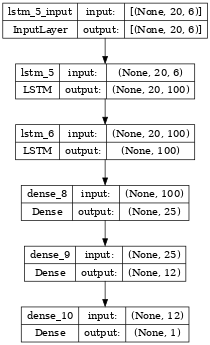

In [52]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 6)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(12))
model.add(layers.Dense(1))

plot_model(model, show_shapes = True,expand_nested = True,dpi = 50)

In [53]:
model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=5)

Epoch 1/5
515/515 [==============================] - 6s 6ms/step - loss: 0.0043
Epoch 2/5
515/515 [==============================] - 3s 5ms/step - loss: 0.0019
Epoch 3/5
515/515 [==============================] - 3s 5ms/step - loss: 0.0015
Epoch 4/5
515/515 [==============================] - 3s 5ms/step - loss: 0.0011
Epoch 5/5
515/515 [==============================] - 3s 5ms/step - loss: 0.0011


In [54]:
predictions = model.predict(x_test)
predictions = scaler_for_adjclose.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

5/5 [==============================] - 1s 3ms/step
The root mean squared error is 151.77


/tmp/ipykernel_32/463297934.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



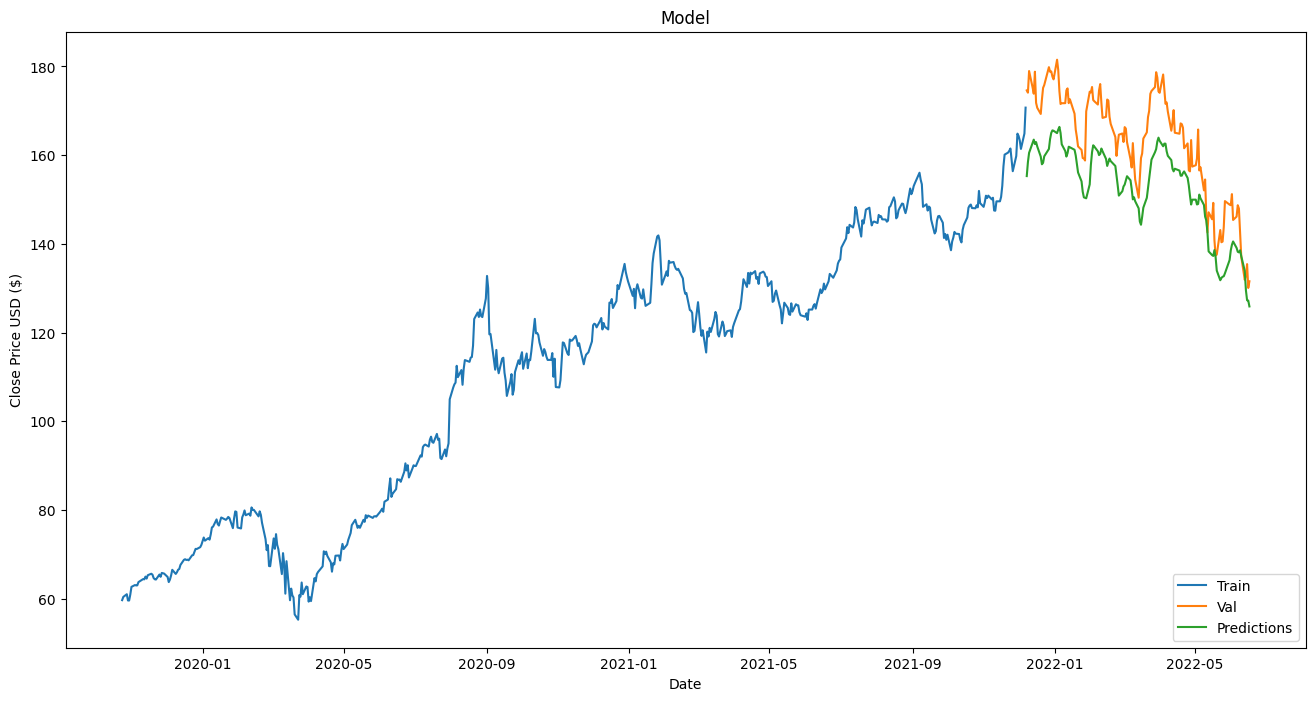

In [55]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [56]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

# GRU
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

In [57]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df = df[["Date","Adj Close"]]

In [58]:
df.head(3)

Date  Adj Close
0  1980-12-12   0.100178
1  1980-12-15   0.094952
2  1980-12-16   0.087983

In [59]:
closedf = df[df['Date'] > '2020-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  621


In [60]:
closedf.head(3)

Date  Adj Close
9847  2020-01-02  73.785912
9848  2020-01-03  73.068565
9849  2020-01-06  73.650795

In [61]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(621, 1)


In [62]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (372, 1)
test_data:  (249, 1)


In [63]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [64]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (356, 15)
y_train:  (356,)
X_test:  (233, 15)
y_test (233,)


In [65]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (356, 15, 1)
X_test:  (233, 15, 1)


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(64,return_sequences=True,input_shape=(time_step,1)))
model.add(Dropout(0.10))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [67]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
6/6 [==============================] - 7s 197ms/step - loss: 0.0767 - val_loss: 0.0027
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0289 - val_loss: 0.0176
Epoch 3/200
6/6 [==============================] - 0s 19ms/step - loss: 0.0122 - val_loss: 0.0724
Epoch 4/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0118 - val_loss: 0.0182
Epoch 5/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 6/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0060 - val_loss: 0.0128
Epoch 7/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 8/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 9/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 10/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 11/200
6/6 [

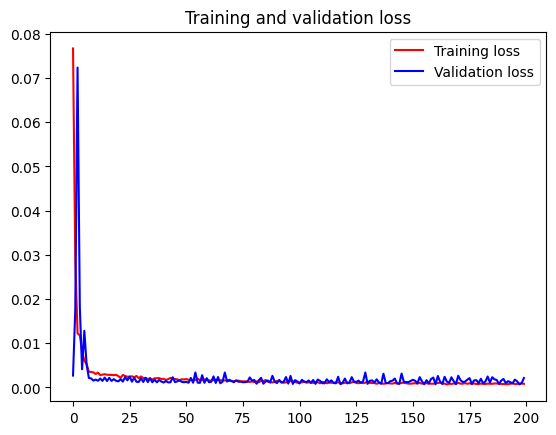

<Figure size 640x480 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [69]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

8/8 [==============================] - 0s 3ms/step


((356, 1), (233, 1))

In [70]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

## Evaluation metrices RMSE and MAE

In [71]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2.7070380582625866
Train data MSE:  7.328055048882075
Train data MAE:  2.0342406751318083
-------------------------------------------------------------------------------------
Test data RMSE:  5.823844332480372
Test data MSE:  33.91716280896375
Test data MAE:  5.010254119484308


-RMSE (Root Mean Squared Error):

Measures the average magnitude of errors, giving more weight to larger errors.
Provides an estimate of the standard deviation of the prediction errors.
Sensitive to outliers due to the squaring of errors.
Commonly used when larger errors should be penalized more.


If you obtain an RMSE (Root Mean Squared Error) value of 5, it means that, on average, the predictions made by your model have an error of approximately 5 units in the same scale as your target variable. keep in mind it penalises (gives more weight) large errors/ outliers.

-MSE (Mean Squared Error):

Measures the average squared differences between predicted and actual values.
Represents the average of the squared errors.
Emphasizes larger errors more than MAE since errors are squared.
Useful for optimization algorithms due to its differentiability.

If you obtain a Mean Squared Error (MSE) value of 25, it means that, on average, the squared differences between your predicted values and the actual values are 25. The MSE is calculated by taking the mean (average) of the squared errors.

-MAE (Mean Absolute Error):

Measures the average magnitude of errors without squaring them.
Represents the average of the absolute differences between predicted and actual values.
Less sensitive to outliers compared to RMSE and MSE.
Provides a straightforward interpretation of the average prediction error.

A MAE of 4 means, on average, your model's predictions are off by 4 units in the scale of the target variable.

## Explained Variance score

In [72]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9876338591479643
Test data explained variance regression score: 0.9234081386939808


It measures the proportion of the variance in the target variable that is explained by the model. The score ranges from 0 to 1, where a score of 1 indicates perfect prediction, and lower scores indicate less ability to explain the variance in the data.

## R2 Score

In [73]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.986975378732882
Test data R2 score: 0.7764239011321131


The explained variance regression score and the R-squared (R2) score both measure the goodness of fit of a regression model, indicating how well the model explains the variance in the target variable

The explained variance regression score directly measures the proportion of variance explained by the model.
The R2 score is a slightly broader metric, as it considers both the explained and unexplained variance and calculates the ratio of the explained variance to the total variance.

## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [74]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("----------------------------------------------------------------------")
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0007577064290560027
Train data MPD:  0.07174793009473777
----------------------------------------------------------------------
Test data MGD:  0.00134792231911596
Test data MPD:  0.21332547659399742


-Mean Geometric Deviation (MGD):

Explanation: MGD is a measure that assesses the geometric mean of the ratio of predicted to actual values. It provides insights into the geometric average of the model's performance across the test data.
Your Value (0.0010630106719831207): The MGD value you've shared is quite small, indicating that, on average, the predictions are close to the actual values. Smaller MGD values suggest good alignment between predicted and actual values.

-Mean Percentage Deviation (MPD):

Explanation: MPD is a metric that calculates the percentage deviation between predicted and actual values and then takes the average of these percentages. It provides a sense of the average percentage difference between the predicted and actual values.
Your Value (0.16844344229348782): The MPD value you've provided indicates that, on average, the model's predictions deviate by approximately 16.84% from the actual values. Lower MPD values are generally desirable, but the interpretation depends on the specific context of your problem

In [75]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Adj Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (621, 1)
Test predicted data:  (621, 1)


## Predicting next 30 days

In [76]:
time_step

15

In [77]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [78]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [79]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [80]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

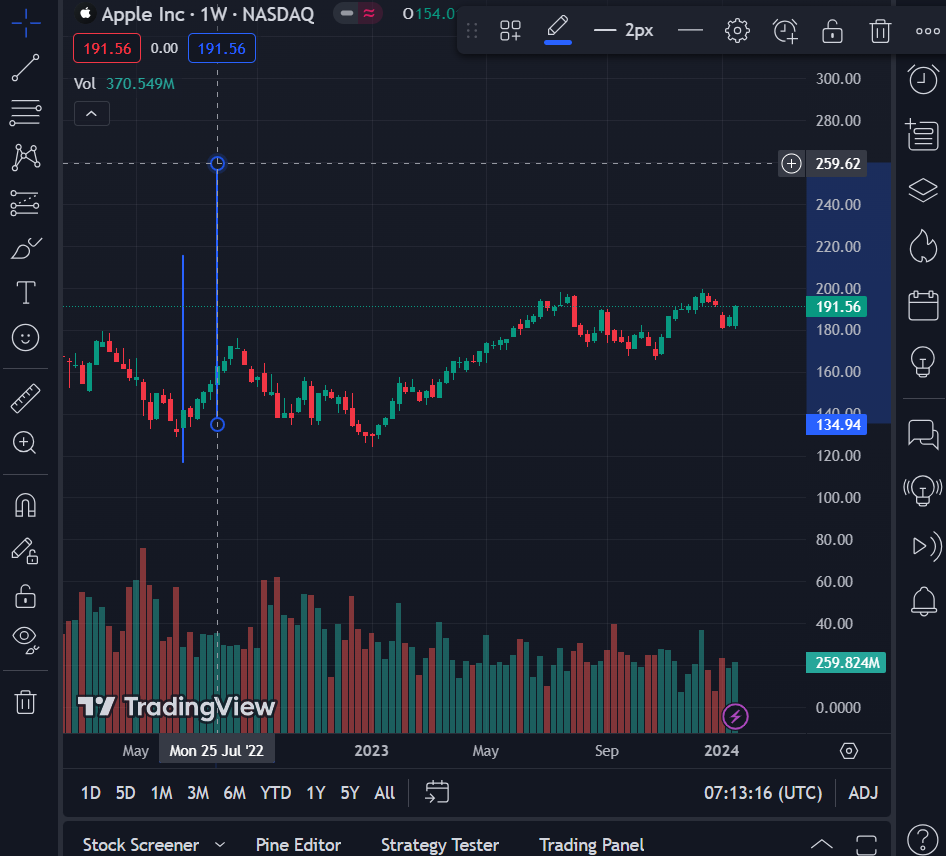

In [81]:
df.tail()

Date   Adj Close
10463  2022-06-13  131.880005
10464  2022-06-14  132.759995
10465  2022-06-15  135.429993
10466  2022-06-16  130.059998
10467  2022-06-17  131.559998

# ARIMA
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid orange">
    <p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">

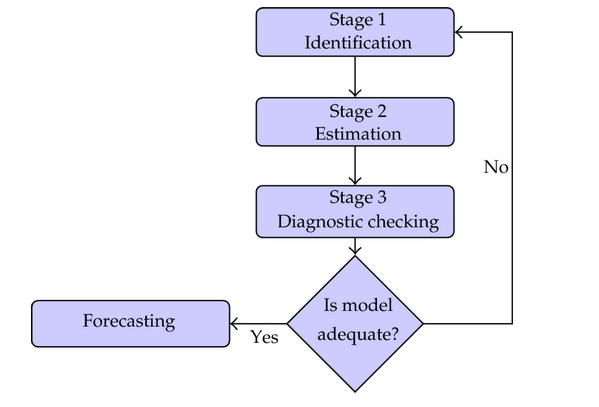

-in stage one we will diagnose the time sreies and determine if it's stationary or not, if it's not stationary we will aplly some methods to transform it to a stationary time series

-in stage two we will apply models to estimate the data ,evaluate them and choose the best estimator

-in stage three we will diagnose the best estimator and decide if this model is doing well or not

-Lastly we will forecaste the closing prices for the next three years

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [254]:
df = pd.read_csv("/kaggle/input/apple-stock-price-from-19802021/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[9847:]

In [255]:
df = df.set_index('Date')
df.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.785912  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  73.068565  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.650795  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  73.304413  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  74.483620  132079200

In [256]:
train_data = df #[:int(len(df)*0.8)]
print(train_data.shape)

(621, 6)


In [257]:
test_data=df #[int(len(df)*0.8):]
print(test_data.shape)

(621, 6)


## Stationary check?!
staionarity means that the statistical properties of a time series do not change over time. and it's important because many useful analytical tools and statistical tests and models rely on it

we're goning to use dicky-fuller test to diagnose if the time series is stationarity or not

In [258]:
from statsmodels.tsa.stattools import adfuller
resuts=adfuller(train_data['Close'])
resuts

(-1.64890983781908,
 0.45760903857751295,
 1,
 619,
 {'1%': -3.440958441424668,
  '5%': -2.86622052433566,
  '10%': -2.569262629991048},
 2904.45532316904)

In [259]:
p_value=resuts[1]
p_value

0.45760903857751295

you could see the p-value is equal to 0.99 which means that the time series is not stationarity so there some models we can't use such as AR and MR for instance. to fix this problem we 'll be working with close prices returns.

In [260]:
train_data['Close_return']=train_data["Adj Close"].diff()
train_data.head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.785912  135480400   
2020-01-03  74.287498  75.144997  74.125000  74.357498  73.068565  146322800   
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.650795  118387200   
2020-01-07  74.959999  75.224998  74.370003  74.597504  73.304413  108872000   
2020-01-08  74.290001  76.110001  74.290001  75.797501  74.483620  132079200   

            Close_return  
Date                      
2020-01-02           NaN  
2020-01-03     -0.717347  
2020-01-06      0.582230  
2020-01-07     -0.346382  
2020-01-08      1.179207

In [261]:
# plotting Close_return column
fig=px.line(train_data,x=train_data.index[1:],y=train_data.Close_return[1:],width=1000,height=400)
fig.update_layout(title='The Closing prices for Apple',xaxis_title='Years',yaxis_title='Closing Price')
fig.update_layout({'plot_bgcolor':'white'})
fig.show()

so we can expect that the time series is a stationarity but to make sure we will apply the dicky-fuller test once again

In [262]:
result1=adfuller(train_data['Close_return'][1:])
result1

(-26.606686474938236,
 0.0,
 0,
 619,
 {'1%': -3.440958441424668,
  '5%': -2.86622052433566,
  '10%': -2.569262629991048},
 2891.1099552977084)

In [263]:
p_value=result1[1]
p_value

0.0

So as you could see now the p-value is equal to 0 which means that this time series is stationarity

### Before we move to the next stage we have to plot the ACF and PACF plots to get some insights of the lags and the correlation between them

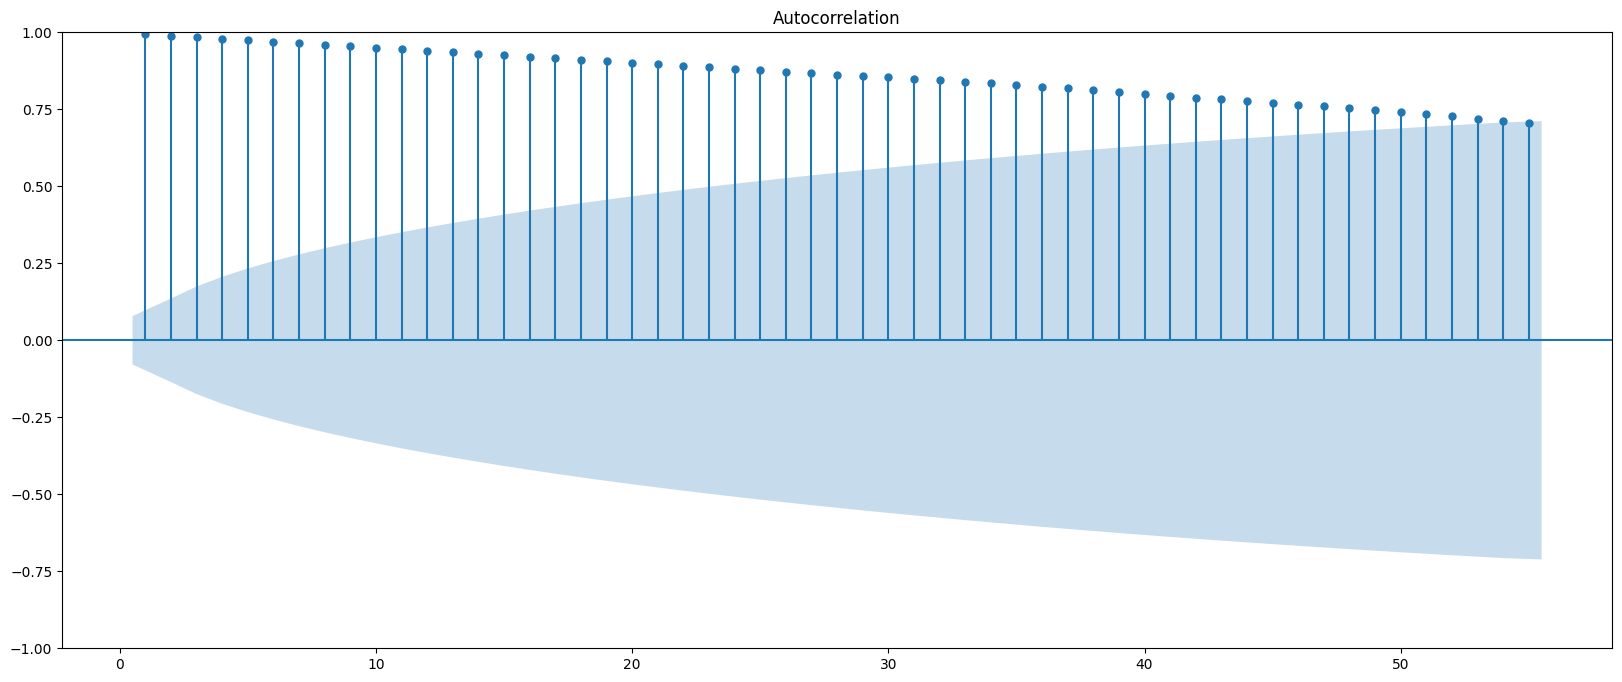

In [264]:
#importing plot_acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_data['Adj Close'],lags=55,zero=False,alpha=0.05)
plt.show()

As you could see all the lag till 41 lag are significant

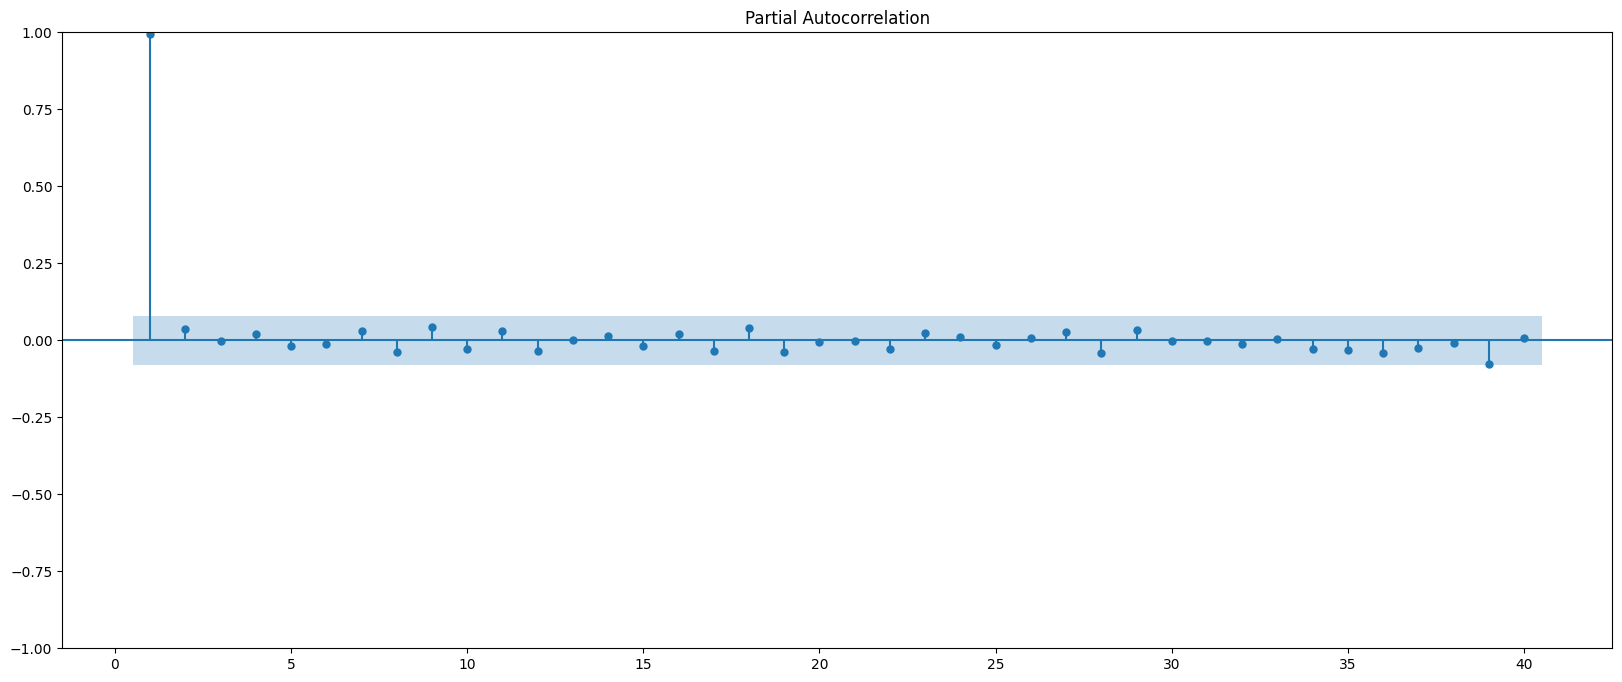

In [265]:
#importing plot_pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_data['Adj Close'],zero=False,lags=40,alpha=0.05)
plt.show()

so you can see from the figure that only the first lag is significant but the others aren't

## Stage 2
time to apply ARIMA Model to estimate

In [266]:
train_data['Adj Close']

Date
2020-01-02     73.785912
2020-01-03     73.068565
2020-01-06     73.650795
2020-01-07     73.304413
2020-01-08     74.483620
                 ...    
2022-06-13    131.880005
2022-06-14    132.759995
2022-06-15    135.429993
2022-06-16    130.059998
2022-06-17    131.559998
Name: Adj Close, Length: 621, dtype: float64

In [267]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [268]:
from statsmodels.tsa.arima.model import ARIMA
import traceback

P = []
Q = []
aic_arima = []
llf_arima = []

for q in [0, 1, 2, 3, 4, 5]:
    for p in [0, 1, 2, 3, 4, 5]:
        try:
            model = ARIMA(train_data['Adj Close'], order=(p, 1, q))
            result = model.fit()
            P.append(p)
            Q.append(q)
            aic_arima.append(result.aic)
            llf_arima.append(result.llf)
        except Exception as e:
            print(f"Error for p={p}, q={q}: {str(e)}")
            # Print traceback for more detailed error information
            traceback.print_exc()

            P.append(p)
            Q.append(q)
            aic_arima.append(None)
            llf_arima.append(None)


In [269]:
arima_df=pd.DataFrame({'p':P,'q':Q,'aic':aic_arima,'log_likelihood':llf_arima})
arima_df.sort_values('log_likelihood',ascending=False)

p  q          aic  log_likelihood
34  4  5  2967.701179    -1473.850590
28  4  4  2966.079268    -1474.039634
35  5  5  2970.312059    -1474.156029
27  3  4  2965.755427    -1474.877713
17  5  2  2969.040166    -1476.520083
33  3  5  2971.162956    -1476.581478
32  2  5  2969.399987    -1476.699994
26  2  4  2967.773081    -1476.886541
20  2  3  2968.453257    -1478.226629
23  5  3  2974.500421    -1478.250211
15  3  2  2968.519790    -1478.259895
16  4  2  2971.013564    -1478.506782
22  4  3  2973.423389    -1478.711695
21  3  3  2972.388380    -1479.194190
11  5  1  2973.238555    -1479.619277
31  1  5  2974.886987    -1480.443493
29  5  4  2983.954340    -1481.977170
25  1  4  2978.095837    -1483.047918
30  0  5  2978.137381    -1483.068690
24  0  4  2976.143618    -1483.071809
5   5  0  2978.472191    -1483.236095
10  4  1  2978.820182    -1483.410091
4   4  0  2976.974809    -1483.487404
19  1  3  2977.673272    -1483.836636
9   3  1  2977.745641    -1483.872821
3   3  0  2976.050267    -1484.025133
18  0  3  2976.258988    -1484.129494
14  2  2  2978.603082    -1484.301541
8   2  1  2976.890044    -1484.445022
13  1  2  2976.897877    -1484.448939
7   1  1  2974.911536    -1484.455768
12  0  2  2974.938523    -1484.469262
6   0  1  2972.957653    -1484.478826
2   2  0  2974.970386    -1484.485193
1   1  0  2972.991674    -1484.495837
0   0  0  2973.815375    -1485.907688

According to Log Likelihood the best model is ARIMA(4,1,5)

In [270]:
arima_df.sort_values('aic',ascending=True)

p  q          aic  log_likelihood
27  3  4  2965.755427    -1474.877713
28  4  4  2966.079268    -1474.039634
34  4  5  2967.701179    -1473.850590
26  2  4  2967.773081    -1476.886541
20  2  3  2968.453257    -1478.226629
15  3  2  2968.519790    -1478.259895
17  5  2  2969.040166    -1476.520083
32  2  5  2969.399987    -1476.699994
35  5  5  2970.312059    -1474.156029
16  4  2  2971.013564    -1478.506782
33  3  5  2971.162956    -1476.581478
21  3  3  2972.388380    -1479.194190
6   0  1  2972.957653    -1484.478826
1   1  0  2972.991674    -1484.495837
11  5  1  2973.238555    -1479.619277
22  4  3  2973.423389    -1478.711695
0   0  0  2973.815375    -1485.907688
23  5  3  2974.500421    -1478.250211
31  1  5  2974.886987    -1480.443493
7   1  1  2974.911536    -1484.455768
12  0  2  2974.938523    -1484.469262
2   2  0  2974.970386    -1484.485193
3   3  0  2976.050267    -1484.025133
24  0  4  2976.143618    -1483.071809
18  0  3  2976.258988    -1484.129494
8   2  1  2976.890044    -1484.445022
13  1  2  2976.897877    -1484.448939
4   4  0  2976.974809    -1483.487404
19  1  3  2977.673272    -1483.836636
9   3  1  2977.745641    -1483.872821
25  1  4  2978.095837    -1483.047918
30  0  5  2978.137381    -1483.068690
5   5  0  2978.472191    -1483.236095
14  2  2  2978.603082    -1484.301541
10  4  1  2978.820182    -1483.410091
29  5  4  2983.954340    -1481.977170

According to AIC Score the best model is ARIMA(2,1,2)

now let's fit the model with auto_arima

In [271]:
! pip install pmdarima

In [272]:
from pmdarima.arima import auto_arima
model_auto = auto_arima(train_data["Adj Close"], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model_auto

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2975.053, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2974.119, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2974.075, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2973.815, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2976.002, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.668 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

this method suggest ARIMA(1,1,0)

## stage 3
from stage two we've got there models ARIMA(4,1,5), ARIMA(2,1,2) and ARIMA(1,1,0) . so now we will diagnose them and choose the best model of them according to mean squared error

# AIMA(4,1,5)

In [273]:
model1=ARIMA(train_data["Adj Close"],order=(4,1,5))
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  621
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -1473.851
Date:                Mon, 22 Jan 2024   AIC                           2967.701
Time:                        06:20:15   BIC                           3011.998
Sample:                             0   HQIC                          2984.920
                                - 621                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7862      0.178     -4.410      0.000      -1.136      -0.437
ar.L2          0.1988      0.274      0.725      0.468      -0.338       0.736
ar.L3         -0.5034      0.274     -1.835      0.066      -1.041       0.034
ar.L4         -0.8448      0.177     -4.761      0.000      -1.193      -0.497
ma.L1          0.7522      0.181      4.165      0.000       0.398       1.106
ma.L2         -0.2605      0.259     -1.006      0.314      -0.768       0.247
ma.L3          0.5064      0.261      1.938      0.053      -0.006       1.019
ma.L4          0.8596      0.154      5.585      0.000       0.558       1.161
ma.L5         -0.0035      0.043     -0.083      0.934      -0.087       0.080
sigma2         6.7530      0.322     20.962      0.000       6.122       7.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.04
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [274]:
resid1=result1.resid

# ARIMA (2,1,2)

In [275]:
model2=ARIMA(train_data["Adj Close"],order=(2,1,2))
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  621
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1484.302
Date:                Mon, 22 Jan 2024   AIC                           2978.603
Time:                        06:20:16   BIC                           3000.752
Sample:                             0   HQIC                          2987.212
                                - 621                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1007      2.154     -0.047      0.963      -4.322       4.120
ar.L2          0.2008      0.517      0.388      0.698      -0.813       1.215
ma.L1          0.0303      2.154      0.014      0.989      -4.191       4.252
ma.L2         -0.2045      0.471     -0.434      0.664      -1.127       0.718
sigma2         7.0301      0.312     22.514      0.000       6.418       7.642
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.23
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [276]:
resid2=result2.resid

# ARIMA (1,1,0)

In [277]:
model3=ARIMA(train_data["Adj Close"],order=(1,1,0))
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  621
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1484.496
Date:                Mon, 22 Jan 2024   AIC                           2972.992
Time:                        06:20:16   BIC                           2981.851
Sample:                             0   HQIC                          2976.435
                                - 621                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0674      0.034     -2.010      0.044      -0.133      -0.002
sigma2         7.0344      0.310     22.725      0.000       6.428       7.641
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.59
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [278]:
resid3=result3.resid

In [279]:
print('the mean square error for ARIMA1 is',np.mean(np.square(resid1)))
print('the mean square error for ARIMA2 is',np.mean(np.square(resid2)))
print('the mean square error for ARIMA3 is',np.mean(np.square(resid3)))

the mean square error for ARIMA1 is 15.54199119678428
the mean square error for ARIMA2 is 15.785747088597526
the mean square error for ARIMA3 is 15.790158977251082


so the best model is ARIMA(4,1,5). but i've noticed from the summary table that most of the coefficients aren't significant the p-values from most of them are higher than 0.05.

# Stage 4
Forecast time

In [281]:
# ARIMA DOESNT on test data?!?!?

# # Make predictions on the test data
# test_predictions = result.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

# # Plot actual vs. predicted values for the test data
# plt.figure(figsize=(10, 6))
# plt.plot(test_data["Adj Close"], label='Actual Data', color='blue')
# plt.plot(test_predictions, label='Predictions', color='red', linestyle='--')
# plt.title('ARIMA Model - Actual vs. Predicted (Test Data)')
# plt.xlabel('Date')
# plt.ylabel('Adj Close Price')
# plt.legend()
# plt.show()

Text(0.5, 1.0, 'Prediction vs Actual ')

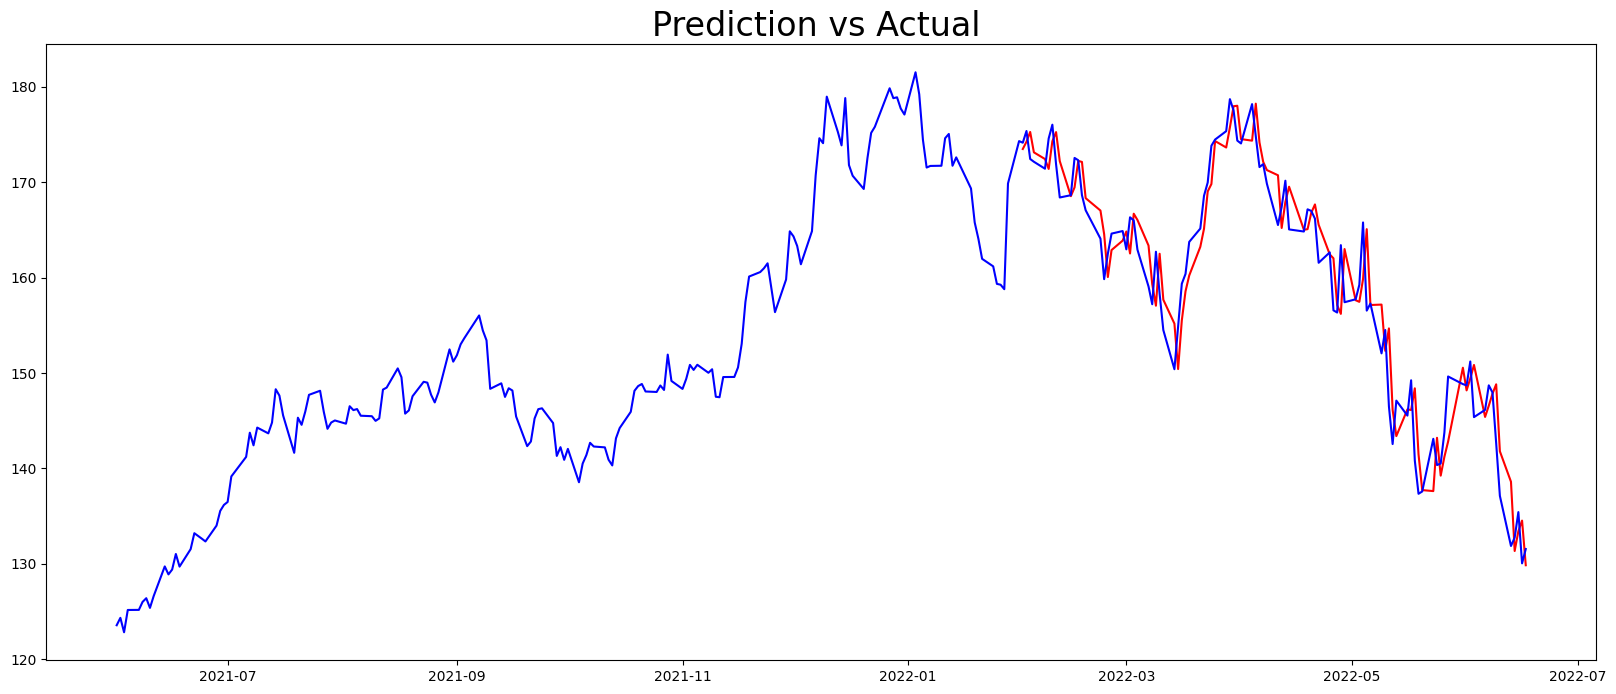

In [299]:
start_date = "2022-02-01"

end_date = "2022-06-17"
model_predict = result1.predict(start = start_date, end = end_date)

plt.rcParams['figure.figsize'] = (20,8)
plt.plot(model_predict[start_date:end_date], color = "red")
plt.plot(df['Adj Close']["2021-06-01":end_date],color="blue")
plt.title("Prediction vs Actual ", size = 24)

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid red">
    <p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">
        <p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid red">
    <p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid yellow">
        <p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

In [284]:
df = df.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
df.head()

Adj Close  Close_return
Date                               
2020-01-02  73.785912           NaN
2020-01-03  73.068565     -0.717347
2020-01-06  73.650795      0.582230
2020-01-07  73.304413     -0.346382
2020-01-08  74.483620      1.179207

In [285]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('Weak evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')

In [286]:
adfuller_test(df['Adj Close'])

ADF Test Statistic: -1.643501994439995
p-value: 0.46043149067185096
Weak evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


In [287]:
df1=df-df.shift(1)
df1 = df1.dropna()

In [288]:
adfuller_test(df1['Adj Close'])

ADF Test Statistic: -26.581708988063447
p-value: 0.0
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


The given Time Series is Stationary because:

ADF Statistics Value is Negative

P-Value is Less than 0.05

Therefeore, this statisfies the Alternate Hypothesis of ADF Test-No Unit Root Exists, Time Series is Stationary

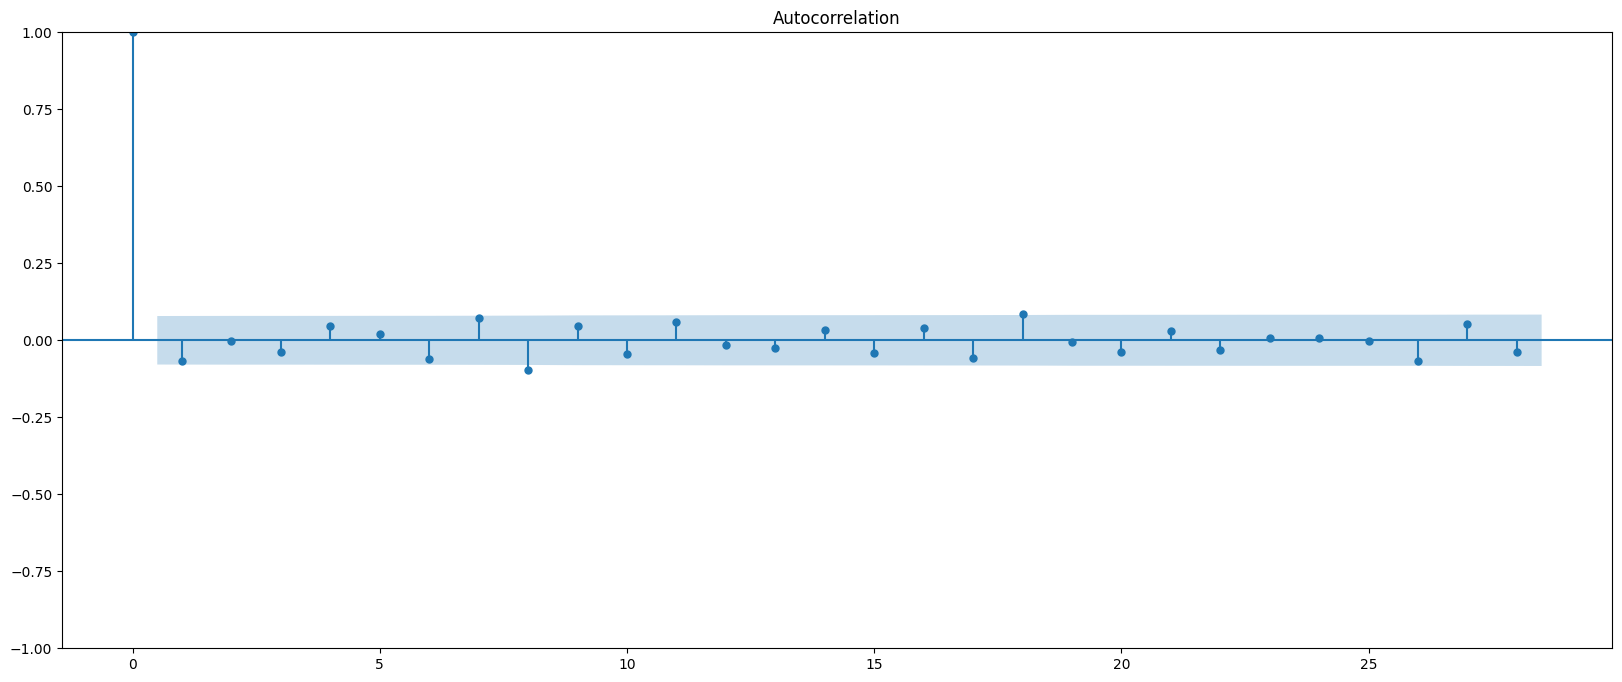

In [289]:
plot_acf(df1['Adj Close']);

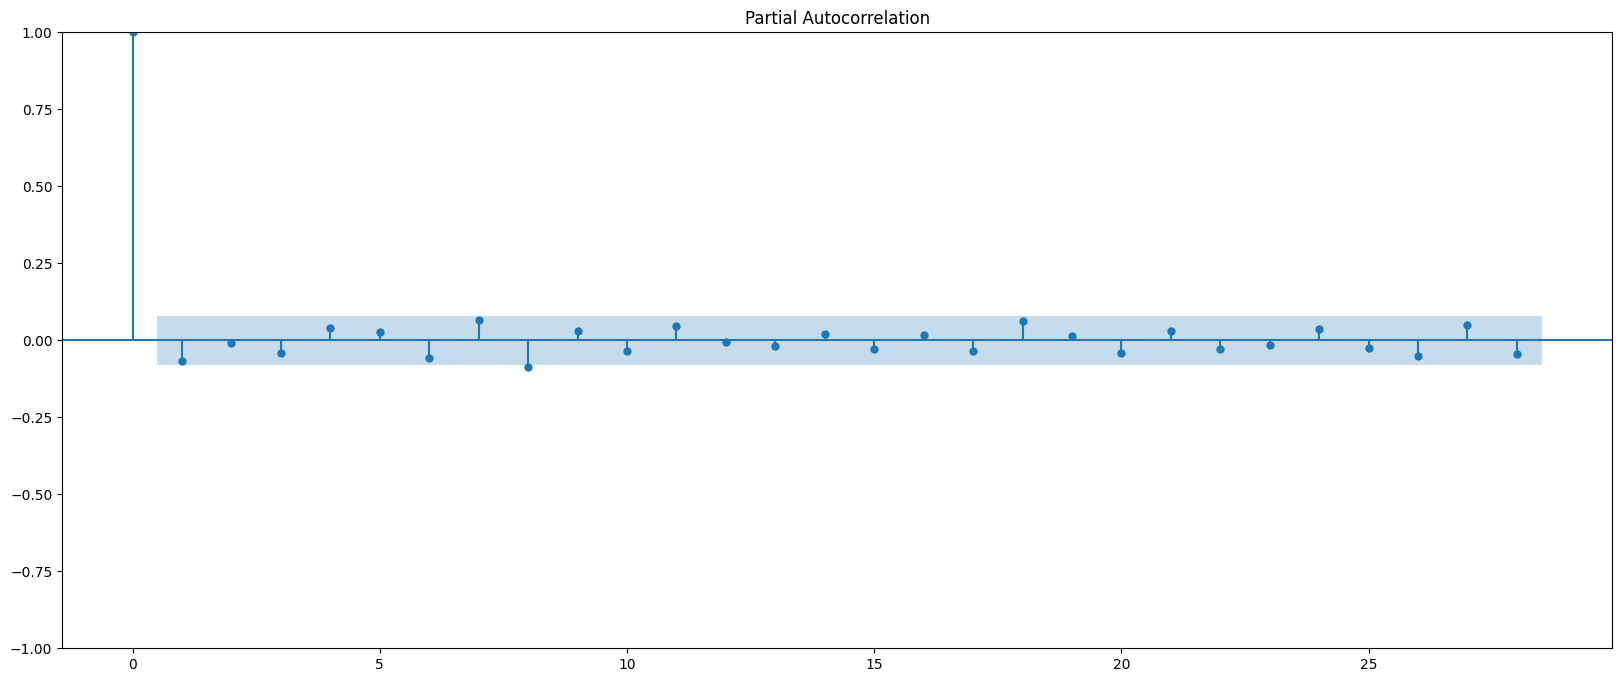

In [290]:
plot_pacf(df1['Adj Close']);

### Function to get the most optimum p,d,q values for our Model

In [291]:
def optimize_ARIMA(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        endog - the observed variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [292]:
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)
    
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [293]:
result_df = optimize_ARIMA(df['Adj Close'], order_list)
result_df

  0%|          | 0/64 [00:00<?, ?it/s]

(p, d, q)          AIC
0   (2, 1, 6)  2964.548452
1   (6, 1, 2)  2964.883689
2   (3, 1, 4)  2965.755427
3   (4, 1, 4)  2966.079268
4   (2, 1, 7)  2966.342878
..        ...          ...
59  (2, 1, 2)  2978.603082
60  (0, 1, 6)  2978.738176
61  (4, 1, 1)  2978.820182
62  (0, 1, 7)  2978.892995
63  (5, 1, 4)  2983.954340

[64 rows x 2 columns]

In [294]:
best_model = SARIMAX(df['Adj Close'], seasonal_order=(2,1,6,30), simple_differencing=False)
res = best_model.fit()
resid4=res.resid
print(res.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58788D+00    |proj g|=  3.40013D-01


 This problem is unconstrained.



At iterate    5    f=  2.38408D+00    |proj g|=  7.20895D-02

At iterate   10    f=  2.35996D+00    |proj g|=  1.89785D-02

At iterate   15    f=  2.35081D+00    |proj g|=  5.52010D-03

At iterate   20    f=  2.34995D+00    |proj g|=  7.57700D-04

At iterate   25    f=  2.34994D+00    |proj g|=  1.64398D-04

At iterate   30    f=  2.34991D+00    |proj g|=  1.77941D-03

At iterate   35    f=  2.34987D+00    |proj g|=  2.17114D-04

At iterate   40    f=  2.34986D+00    |proj g|=  2.66594D-04

At iterate   45    f=  2.34984D+00    |proj g|=  2.13761D-03

At iterate   50    f=  2.34983D+00    |proj g|=  2.05576D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [295]:
print('the mean square error for SARIMAX is',np.mean(np.square(resid4)))


the mean square error for SARIMAX is 295.62500841885304


In [296]:
start_date = "2022-02-01"

end_date = "2022-06-17"

In [297]:
model_predict = res.predict(start = start_date, end = end_date)

Text(0.5, 1.0, 'Prediction vs Actual ')

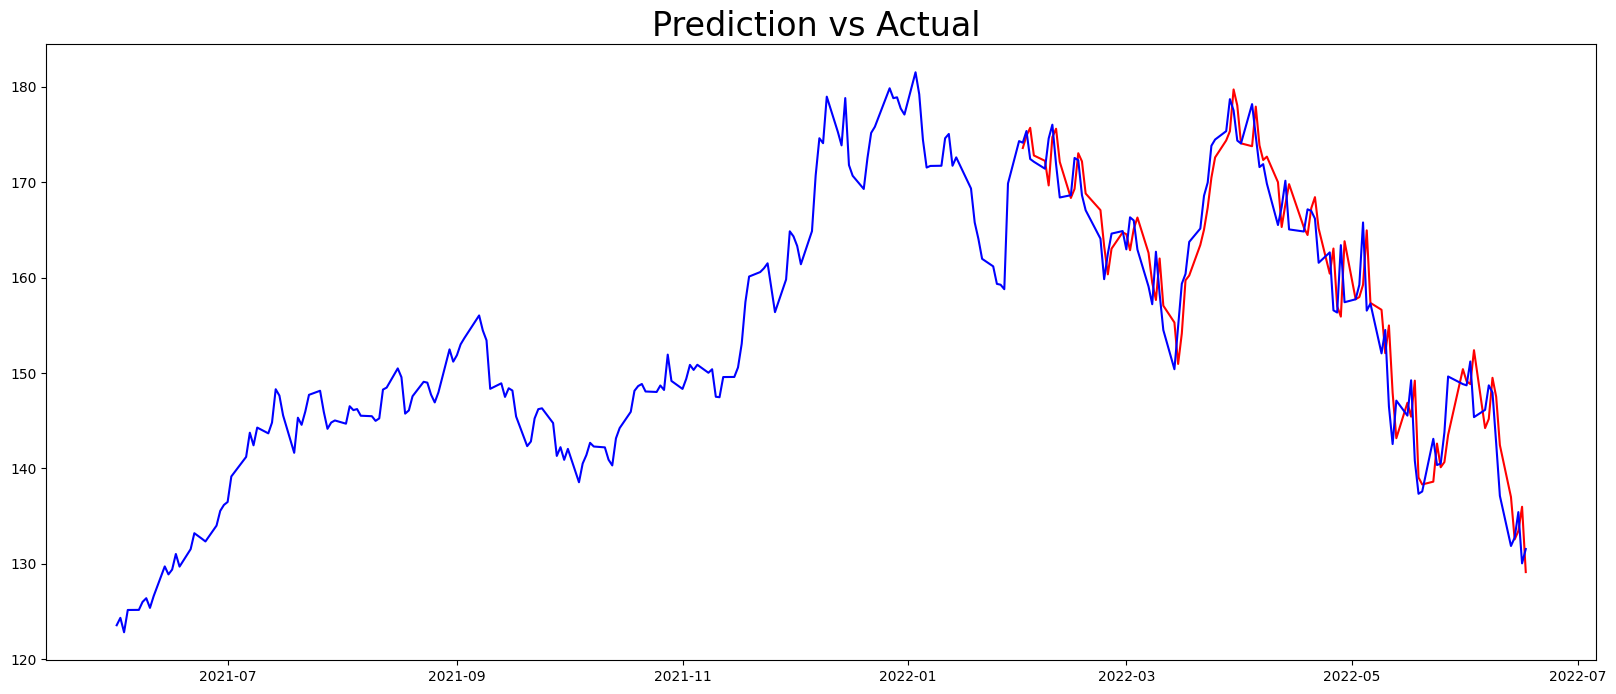

In [298]:
plt.rcParams['figure.figsize'] = (20,8)
plt.plot(model_predict[start_date:end_date], color = "red")
plt.plot(df['Adj Close']["2021-06-01":end_date],color="blue")
plt.title("Prediction vs Actual ", size = 24)